In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# audio.py
from audio import *

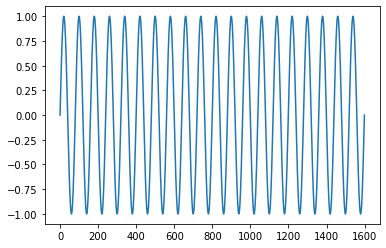

In [2]:
# サンプリング周波数16kHz、周期200Hz、0.1秒のsin波
def plot_sample_sin():
    plt.plot(sin_wave(200, 16000, 100))
    
plot_sample_sin()

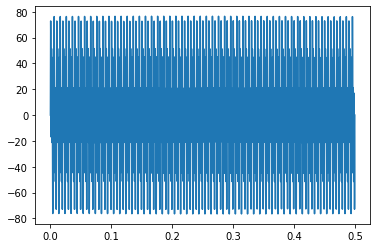

In [3]:
# サンプリング周波数 16kHz

RATE = 16000
MS = 500

# 複数のsin波(周波数, 振幅)の線形和をサンプルデータとする。
def sample_audio():
    data = sum(sin_wave(k, RATE, MS) * a for k, a in [(200, 30), (500, 20), (700, 40)])
    audio = Audio(RATE, data)
    return audio

AUDIO = sample_audio()
AUDIO.plot()

ハミング窓のフレーム長: 64 ms
ハミング窓の要素数: 1024


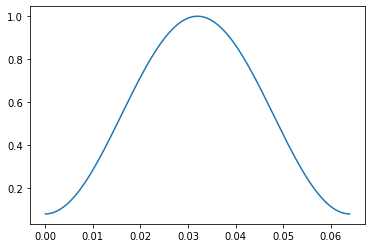

In [4]:
# フレーム長(ms)
FRAME_LENGTH = list(frame_candidates(RATE))[-1]

# ハミング窓の取得
def sample_hamming():
    print("ハミング窓のフレーム長:", FRAME_LENGTH, "ms")
    hw = audio_hamming(FRAME_LENGTH, RATE)
    print("ハミング窓の要素数:", len(hw))
    return hw

HW = sample_hamming()
TIMES = time_axis(HW, RATE)

def plot_hamming():
    plt.plot(TIMES, HW)
    
plot_hamming()

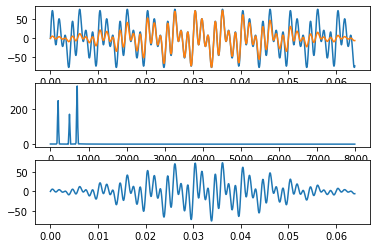

In [5]:
# オーディオデータのクリップリスト(FRAME_LENGTHのフレーム長(ms), STEP(ms)ずつ)
STEP = 10
AUDIO_FRAMES = np.array(list(AUDIO.each_frame(FRAME_LENGTH, STEP)))

# 最初のフレームをプロット
def plot_first_frame():
    _, plot = plt.subplots(3, 1)
    plot0, plot1, plot2 = plot
    
    # サンプルデータの最初のframe_length(ms)までのフレーム
    frame1 = AUDIO_FRAMES[0]
    plot0.plot(TIMES, frame1)

    # ハミング窓の適用
    windowed = frame1 * HW
    plot0.plot(TIMES, windowed)
    
    # 高速フーリエ変換 
    n = len(windowed)
    ffted = np.fft.fft(windowed, n, norm="ortho")
    freq = np.fft.fftfreq(n, d=1/RATE)
    plot1.plot(freq[:n//2], np.abs(ffted[:n//2]))
    
    # 逆フーリエ変換
    iffted = np.fft.ifft(ffted) * np.sqrt(n)
    plot2.plot(TIMES, np.real(iffted))
    
plot_first_frame()

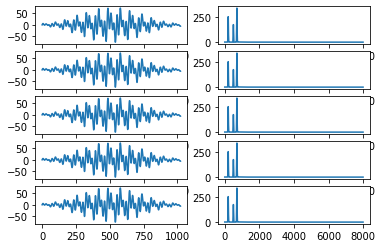

In [6]:
# 最初の5クリップの短時間フーリエ変換のプロット

def plot_stft(count):
    _, plots = plt.subplots(count, 2)
    n = len(HW)
    for _, frame, plot in zip(range(count), AUDIO_FRAMES, plots):
        plot0, plot1 = plot
        
        windowed = frame * HW
        plot0.plot(windowed)
        
        ffted = np.abs(np.fft.fft(windowed, norm="ortho"))[:n//2]
        freq = np.fft.fftfreq(n, d=1/RATE)[:n//2]
        plot1.plot(freq, ffted)
    
plot_stft(5)